In [1]:
import numpy as np
import tncontract as tn
import qutip as qt
import time

from copy import deepcopy
from IPython.display import clear_output

from src.simulation_utils import *
from src.plotting_utils import *

In [2]:
n_sites = 4 # Number of sites (qubits)
cct_depth = 100 # Circuit depth
chi = None # Limit for the bond dimension

psi = tn.onedim.init_mps_allzero(n_sites, 2) # Initialize all qubits in zero

slice_separation = 1

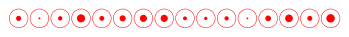

In [3]:
for j in range(cct_depth):
    one_qubit_layer = random_single_qubit_gate_layer(n_sites)
    two_qubit_layer = random_two_qubit_gate_ladder(n_sites)[np.mod(j, 2)]

    psi = tn.onedim.contract_mps_mpo(psi, one_qubit_layer)
    psi.left_canonise(chi=chi)

    psi = tn.onedim.contract_mps_mpo(psi, two_qubit_layer)
    psi.left_canonise(chi=chi)

    if np.mod(2*j, slice_separation) == 0:
        phi = deepcopy(psi)
        phi.left_canonise(normalise=True)

        phi_vec = tn.onedim.contract_virtual_indices(phi)
        phi_vec.fuse_indices('physout','physout')

        prob_vec = abs(phi_vec.data.reshape(-1, 1)) ** 2

        clear_output(wait=True)
        speckle_pattern(prob_vec)
        plt.show()